In [1]:
from glob import glob
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
data_folder = '../data/data_road/training'
image_shape = (160, 576)

image_paths = glob(os.path.join(data_folder, 'image_2', '*.png'))
label_paths = {
            re.sub(r'_(lane|road)_', '_', os.path.basename(path)): path
            for path in glob(os.path.join(data_folder, 'gt_image_2', '*_road_*.png'))}

In [3]:
# read in sample training image and ground truth label
image_file = '../data/data_road/training/image_2/um_000003.png'
gt_image_file = label_paths[os.path.basename(image_file)]
print(image_file)
print(gt_image_file)

../data/data_road/training/image_2/um_000003.png
../data/data_road/training/gt_image_2/um_road_000003.png


In [11]:
image = cv2.resize(cv2.imread(image_file)[:,:,::-1], image_shape[::-1]) # imread reads in BGR. convert to RGB
gt_image = cv2.resize(cv2.imread(gt_image_file)[:,:,::-1], image_shape[::-1])

In [12]:
image.shape

(160, 576, 3)

(-0.5, 575.5, 159.5, -0.5)

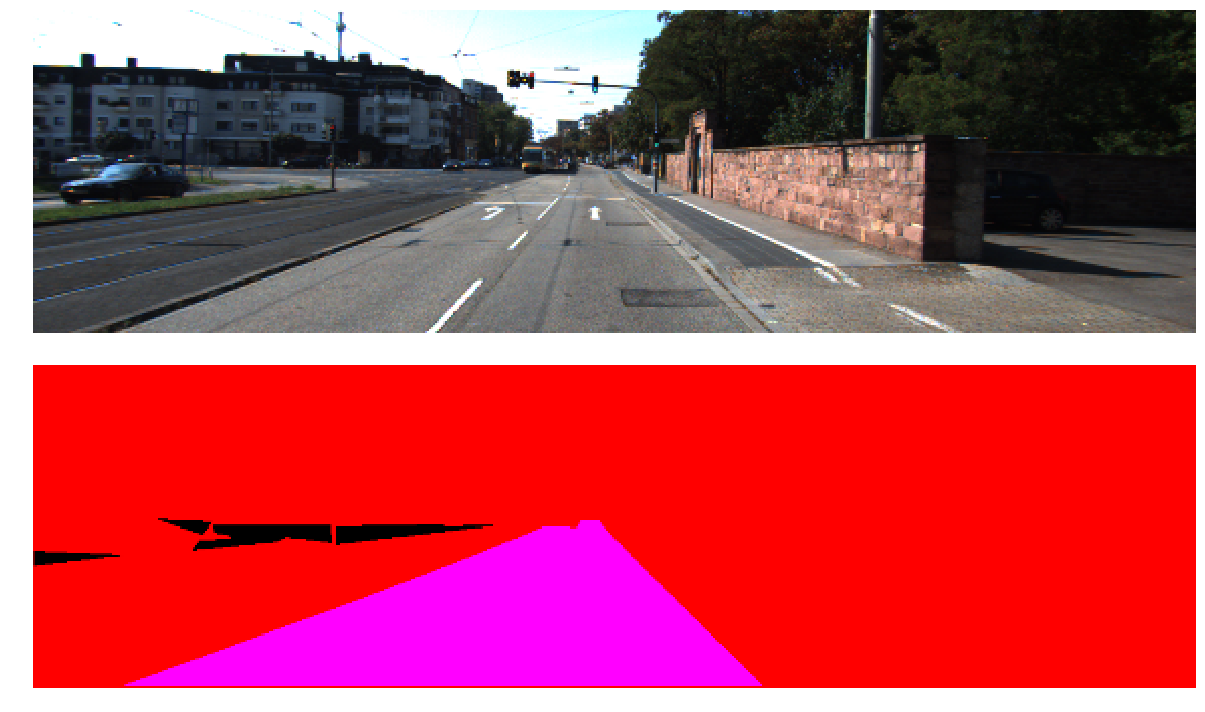

In [13]:
# plot them
f, axs = plt.subplots(2, 1, figsize=(20,10))
f.tight_layout()

axs[0].imshow(image)
axs[0].axis('off')
axs[1].imshow(gt_image)
axs[1].axis('off')
# axs[i].set_title(fname, fontsize=10)
    

In [14]:
# get correct labels
background_color = np.array([255, 0, 0])
gt_bg = np.all(gt_image == background_color, axis=2)
gt_bg = gt_bg.reshape(*gt_bg.shape, 1)
gt_image = np.concatenate((gt_bg, np.invert(gt_bg)), axis=2)
np.shape(gt_image)

(160, 576, 2)

(-0.5, 575.5, 159.5, -0.5)

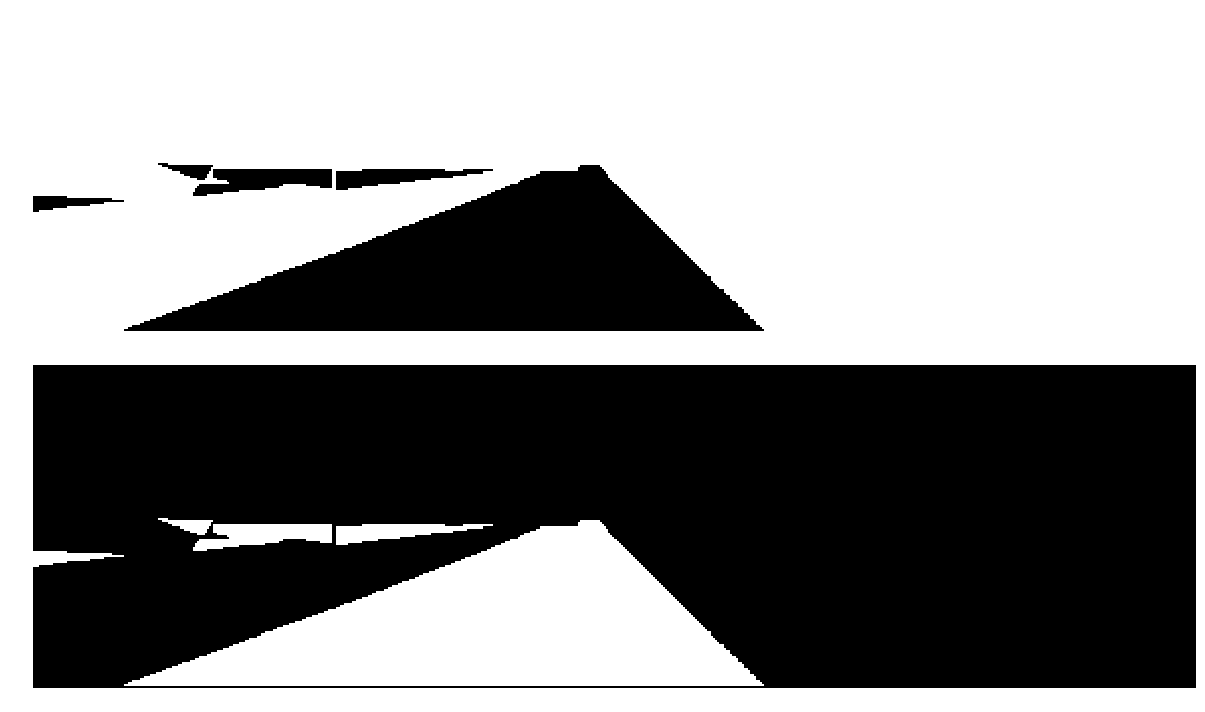

In [15]:
f, axs = plt.subplots(2, 1, figsize=(20,10))
f.tight_layout()

# non road label
axs[0].imshow(gt_image[:,:,0], cmap='gray')
axs[0].axis('off')
# road label
axs[1].imshow(gt_image[:,:,1], cmap='gray')
axs[1].axis('off')